Task-2 : MOVIE RATING PREDICTION WITH PYTHON
codsoft data science internship
Author : Manish Patil

Batch Aprilep may
ct

Domain : Data science


Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques bold text to tackle this problem.
The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#cleaning of data 

In [27]:
data = pd.read_csv("IMDb_Movies_India.csv", encoding ="latin1")
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [31]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [32]:
data.count()

Name        15509
Year        14981
Duration     7240
Genre       13632
Rating       7919
Votes        7920
Director    14984
Actor 1     13892
Actor 2     13125
Actor 3     12365
dtype: int64

In [33]:
#step 2 data cleaning
#checking missing values and null values

In [35]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [36]:
data.dropna(subset=["Rating"],inplace=True)

In [37]:
data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [38]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [39]:
#convert votes to integer and remove commas and convert year (2019) to 2019 and remove min from duration columns

In [55]:
#
# convert votes columns
data['Votes'] = data['Votes'].astype(str).str.replace(',', '').astype(int)

In [58]:
#convert year columns
data['Year'] = data['Year'].astype(str).str.strip('()').astype(int)     

In [62]:
#convert duration column
data['Duration'] = data['Duration'].str.strip('min')

In [63]:
data['Duration'].fillna(data['Duration'].median(),inplace=True)

In [64]:
data.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [65]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int32  
 2   Duration  7919 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int32  
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 618.7+ KB


In [67]:
#step 3 data is cleaned and inputed
#EDA exploritory data analyst

In [68]:
# find top ten movies based on rating

In [70]:
top_movie = data.loc[data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,134.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,2017,134.0,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [71]:
#Distribution of Top 10 movies Year

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


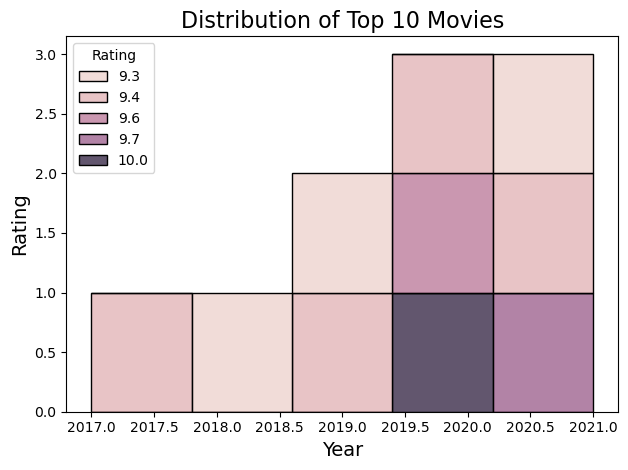

In [72]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [73]:
#Distribution of Genre of movies

In [74]:
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1177
1,"Drama, Romance",447
2,"Action, Crime, Drama",417
3,Action,417
4,"Drama, Family",291


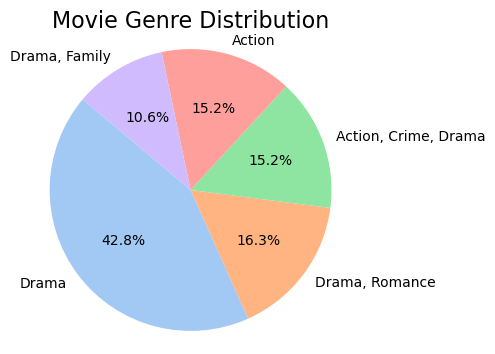

In [76]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [77]:
# Group the data by director and calculate the average rating
director_avg_rating = data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2385,Saif Ali Sayeed,10.0
2720,Sriram Raja,9.7
538,Bobby Kumar,9.6
348,Arvind Pratap,9.4
363,Ashish Dubey,9.4
2763,Suhrud Godbole,9.4
1611,Munni Pankaj,9.4
2984,Venkatesh Bk,9.3
3080,Vishwa Bhanu,9.3
1987,Raghav Jairath,9.3


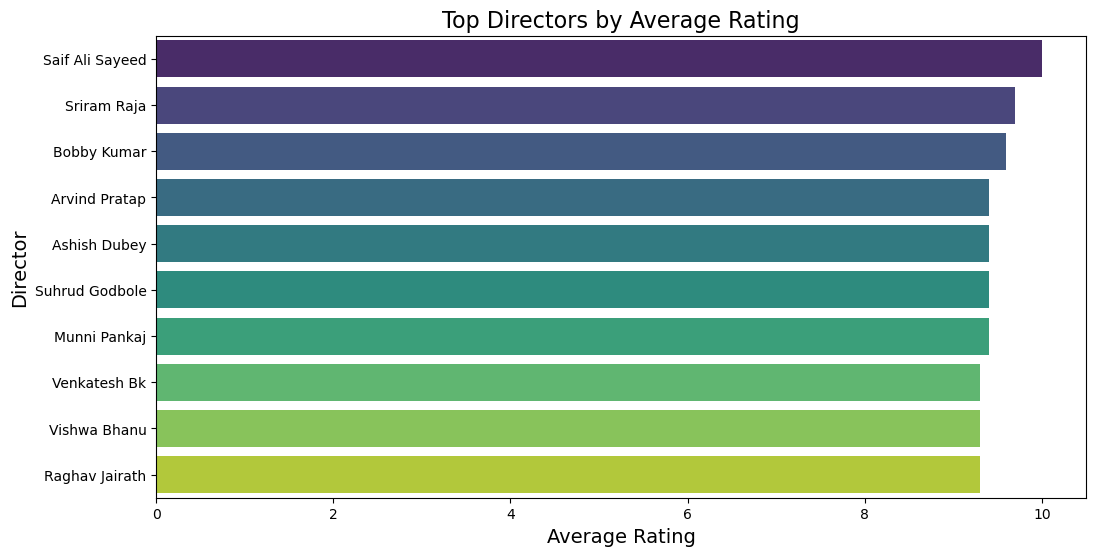

In [78]:

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


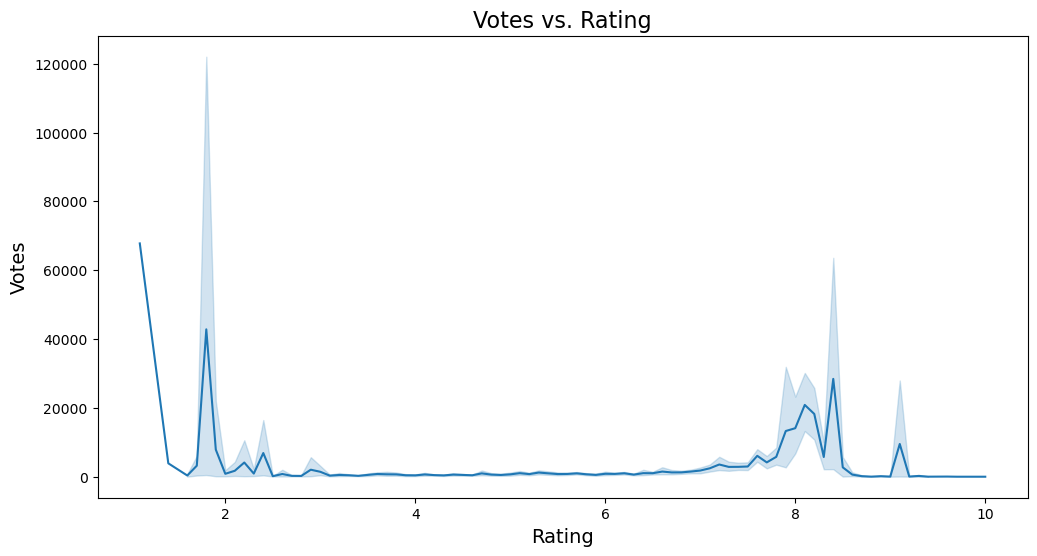

In [80]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

In [81]:
#Distribution of top actors by number of movie

In [82]:
yearly_movie_counts = data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
90,1931,3
86,1932,6
87,1933,5
88,1934,5
...,...,...
1,2017,236
2,2018,228
0,2019,249
9,2020,167


C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


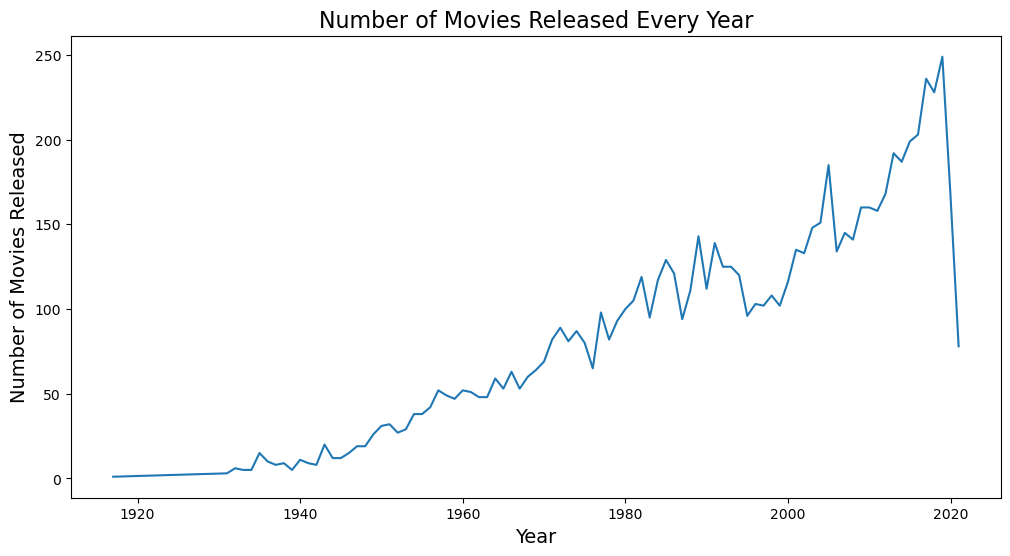

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

In [84]:
#Distribution of Durations of movies by years

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


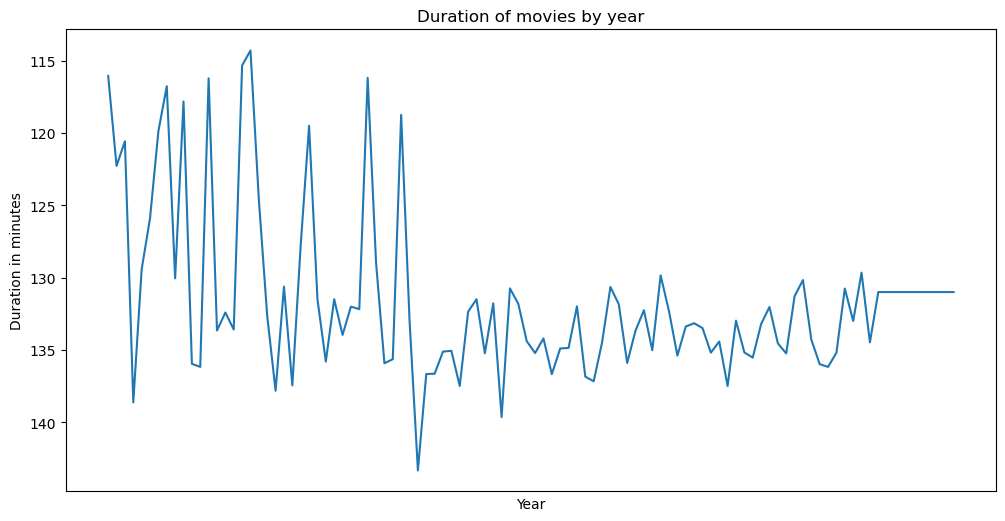

In [91]:
data['Duration'] = data['Duration'].astype(int)
data['Year'] = data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(3400,1023,5))
plt.show()

In [92]:
#Distribution of Number of movies each genre

In [94]:

data['Genre'] = data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,NaN,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,NaN,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,NaN,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,NaN,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,NaN,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,134,NaN,5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125,NaN,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,134,NaN,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,NaN,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [111]:
#featured engineer

In [115]:
# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Drop 'Name' column
trans_data = data.drop(['Name'], axis=1)

# Transform 'Director' column
trans_data['Director'] = labelencoder.fit_transform(data['Director'])

# Transform 'Actor 1' column
trans_data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])

# Transform 'Actor 2' column
trans_data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])

# Transform 'Actor 3' column
trans_data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])

# Transform 'Genre' column (if Genre is already a string)
trans_data['Genre'] = labelencoder.fit_transform(data['Genre'])

# Display the transformed DataFrame
print(trans_data)

trans_data.head()

       Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1      2019       109      0     7.0      8       811     1782     2814   
3      2019       110      0     4.4     35      1749     1589      890   
5      1997       147      0     4.7    827      2005      508       85   
6      2005       142      0     7.4   1086      2643      931     1388   
8      2012        82      0     5.6    326       174     2520     1461   
...     ...       ...    ...     ...    ...       ...      ...      ...   
15501  1992       134      0     5.3    135       500      631     1436   
15503  1989       125      0     5.8     44      2339      550      936   
15504  1988       134      0     4.6     11      1418     1405     2536   
15505  1999       129      0     4.5    655      1338      145     2670   
15508  1998       130      0     6.2     20      1171      631      934   

       Actor 3  
1          377  
3         2572  
5         2449  
6         3029  
8         1205

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,0,7.0,8,811,1782,2814,377
3,2019,110,0,4.4,35,1749,1589,890,2572
5,1997,147,0,4.7,827,2005,508,85,2449
6,2005,142,0,7.4,1086,2643,931,1388,3029
8,2012,82,0,5.6,326,174,2520,1461,1205


In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.0,0.662921,0.000005,0.258363,0.698550,0.979464,0.123042
1,0.980769,0.296667,0.0,0.370787,0.000051,0.557184,0.622893,0.309781,0.839426
2,0.769231,0.420000,0.0,0.404494,0.001390,0.638738,0.199138,0.029586,0.799282
3,0.846154,0.403333,0.0,0.707865,0.001828,0.841988,0.364955,0.483119,0.988577
4,0.913462,0.203333,0.0,0.505618,0.000543,0.055432,0.987848,0.508528,0.393277


In [117]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.126635
Actor 3     0.059636
Actor 2     0.059052
Actor 1     0.039277
Director   -0.008520
Duration   -0.030474
Year       -0.166673
Genre            NaN
Name: Rating, dtype: float64

<Axes: >

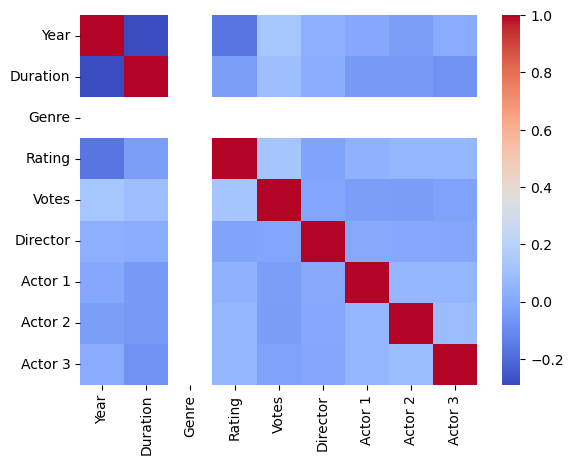

In [118]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")


In [119]:
#Now our transformed columns are much correlated with the target variable so we are ready to go

#Model Building

In [120]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [121]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [123]:
X_test = np.array(X_test)
X_test

array([[1991,  134,    0, ...,  142, 2187,  203],
       [2016,  125,    0, ..., 1894, 2177, 2863],
       [2019,  133,    0, ..., 2437,   50,  876],
       ...,
       [2014,   77,    0, ..., 1501,  548, 2215],
       [1974,  131,    0, ...,  809,  173, 1845],
       [2015,  134,    0, ..., 1305, 1476,  932]], dtype=int64)

In [124]:
y_pred = model.predict(X_test)
y_pred

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.69862983, 5.70548687, 5.39195157, ..., 5.78421362, 5.96735661,
       5.45650504])

In [125]:

print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.08401989702136947
Mean squared error:  1.7437508578016738
Mean absolute error:  1.055091848235964


In [126]:

print(y_test)

9456     3.3
14816    5.3
3213     5.7
3778     7.2
5775     3.5
        ... 
9882     6.2
13537    3.2
14103    4.1
7383     5.9
15246    5.8
Name: Rating, Length: 2376, dtype: float64
